# **Data Loading**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os
import joblib

%matplotlib inline

# from google.colab import files
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# files.upload()

In [3]:
# Memuat dan menampilkan dataframe
csv_loc = 'Dataset/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(csv_loc)

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Didapatkan informasi bahwa terdapat 5.110 records dan 12 kolom yaitu: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, dan stroke. Kolom "id" tidak akan digunakan dalam pengembangan sistem prediksi, maka akan dihapus pada tahap Data Preprocessing. Dan terdapat missing value berupa nilai NaN pada kolom "bmi", maka hal ini akan ditangani pada tahap EDA - Menangani Missing Value.

# **EDA - Deskripsi Variabel**

- id: Unique Identifier
- gender: Jenis kelamin pengguna (Male, Female, Other)
- age: Umur pengguna
- hypertension: Nilai "0" menunjukkan pengguna tidak memiliki tekanan darah tinggi, nilai "1" menunjukkan pengguna memiliki tekanan darah tinggi.
- heart_disease: Nilai "0" menunjukkan pengguna tidak memiliki penyakit jantung, nilai "1" menunjukkan pengguna memiliki penyakit jantung.
- ever_married: Status menikah yang ditunjukkan dengan nilai "Yes" dan "No".
- work_type: Jenis pekerjaan yang ditunjukkan dengan masih anak-anak (children), PNS (Govt_jov), Tidak pernah bekerja (Never_worked), swasta (Private), dan wiraswasta (Self-employed).
- Residence_type: Lingkungan tempat tinggal apakah di pedesaan (Rural) atau di perkotaan (Urban).
- avg_glucose_level: Kadar glukosa rata-rata dalam darah.
- bmi: Indeks massa tubuh atau ukuran berat badan pengguna.
- smoking_status: Status merokok pengguna, apakah dahulu merupakan seorang perokok (formerly smoked), tidak pernah merokok (never smoked), saat ini seorang perokok (smokes), atau tidak diketahui (unknown).
- stroke: Nilai "0" menunjukkan pengguna tidak teridentifikasi memiliki resiko stroke, nilai "1" menunjukkan pengguna teridentifikasi memiliki resiko stroke.

In [4]:
# Mengecek informasi pada dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dari output diatas dapat diketahui bahwa:
-	Terdapat 4 kolom numerik dengan tipe int64, yaitu: id, hypertension, heart_disease, dan stroke. 4 kolom ini nantinya akan masuk kedalam categorical features karena hanya memiliki dua nilai yaitu TRUE dan False.
-	Terdapat 3 kolom numerik dengan tipe data float64, yaitu: age, avg_glucose_level, dan bmi.
- Terdapat 5 kolom dengan tipe object, yaitu: gender, ever_married, work_type, Residence_type, dan smoking_status. Kolom ini merupakan categorical features (fitur non-numerik).

In [5]:
# Melihat deskripsi statistik data
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# **EDA - Menangani Missing Value dan Outliers**

In [6]:
# Mengecek missing value pada dataset
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Diketahui terdapat 201 missing value pada kolom "bmi", maka hal ini akan diatasi dengan mengganti nilai missing value dengan nilai mean (rata-rata) berat badan "bmi" untuk mempertahankan distribusi data.

In [7]:
# Missing value pada fitur "bmi" akan diganti dengan nilai rata-rata berat badan pada fitur "bmi"
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot: xlabel='age'>

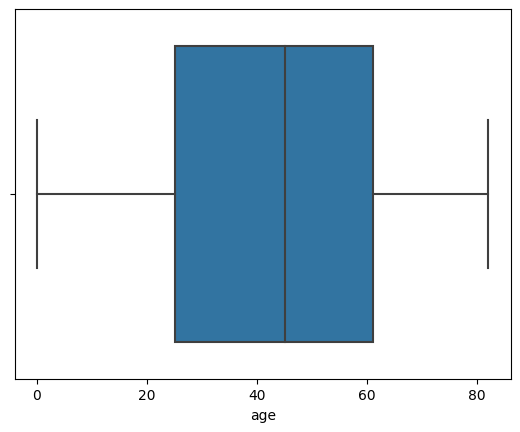

In [8]:
# Melihat outliers pada numerical features "age"
sns.boxplot(x=stroke_data['age'])

<AxesSubplot: xlabel='avg_glucose_level'>

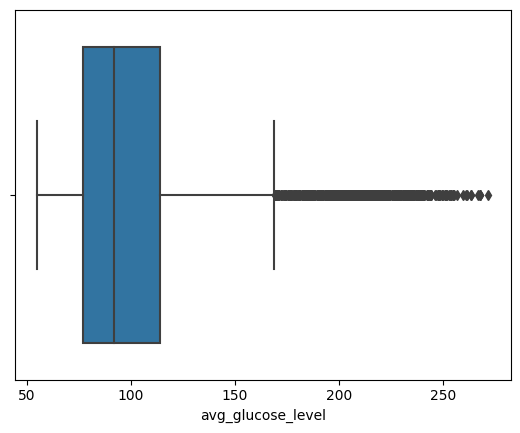

In [9]:
# Melihat outliers pada numerical features "avg_glucose_level"
sns.boxplot(x=stroke_data['avg_glucose_level'])

<AxesSubplot: xlabel='bmi'>

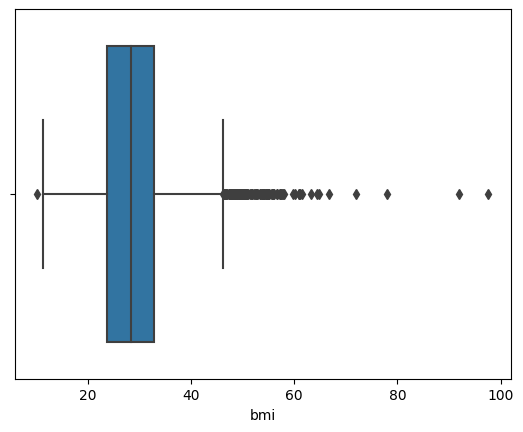

In [10]:
# Melihat outliers pada numerical features "bmi"
sns.boxplot(x=stroke_data['bmi'])

In [11]:
# Menangani outliers pada fitur "bmi"
feature_outliers = ['bmi']

Q1 = stroke_data[feature_outliers].quantile(0.25)
Q3 = stroke_data[feature_outliers].quantile(0.75)
IQR=Q3 - Q1

stroke_data[feature_outliers]=stroke_data[feature_outliers][~((stroke_data[feature_outliers] < (Q1 - 1.5 * IQR))|(stroke_data[feature_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
stroke_data.shape

(5110, 12)

# **EDA - Univariate Analysis**

Langkah selanjutnya membagi fitur pada dataset menjadi numerical features dan categorical features.

In [12]:
categoric_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numeric_features = ['age', 'avg_glucose_level', 'bmi']

## **Categorical Features**
Melakkan analisis terhadap fitur kategori

        Jumlah Sampel  Persentase
Female           2994        58.6
Male             2115        41.4
Other               1         0.0


Text(0.5, 1.0, 'gender')

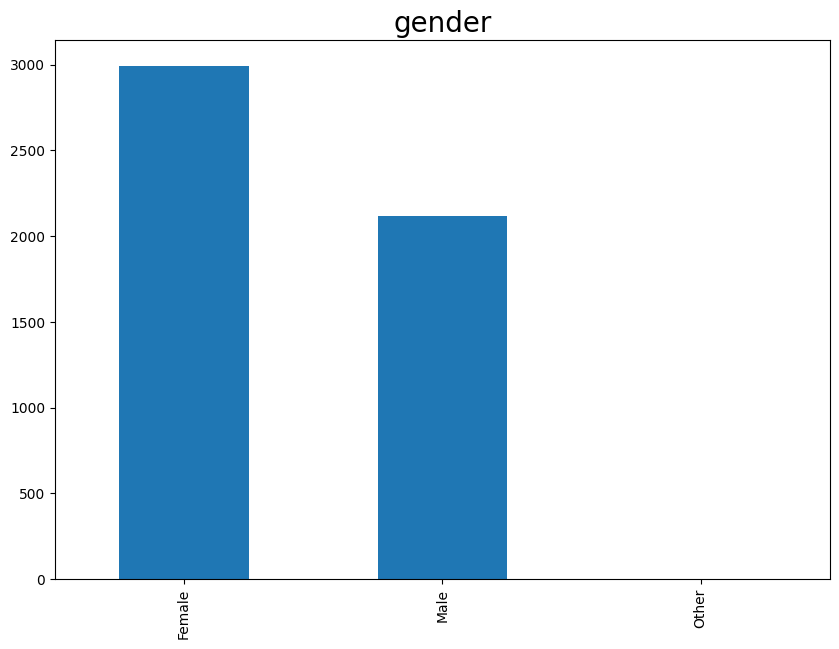

In [13]:
# Memvisualisasikan categorical features "gender"
plt.figure(figsize=(10, 7))
feature = categoric_features[0]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

Dari visualisasi fitur gender diatas terdapat 2 kategori pada fitur gender, secara berurutan dari yang paling banyak yaitu: Female, dan Male. Dari data persentase dapat disimpulkan bahwa lebih dari 50% sampel merupakan perempuan "Female"

In [14]:
# Mengecek jumlah sample pada masing-masing variabel pada fitur "gender"
stroke_data.groupby('gender').agg('count')

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2895,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2088,2115,2115
Other,1,1,1,1,1,1,1,1,1,1,1


Diketahui terdapat sample yang terlalu sedikit pada jenis kelamin "Other" di fitur "gender". Maka nantinya akan dilakukan penghapusan terhadap sample "Other" pada tahap Data Preparation.

   Jumlah Sampel  Persentase
0           4612        90.3
1            498         9.7


Text(0.5, 1.0, 'hypertension')

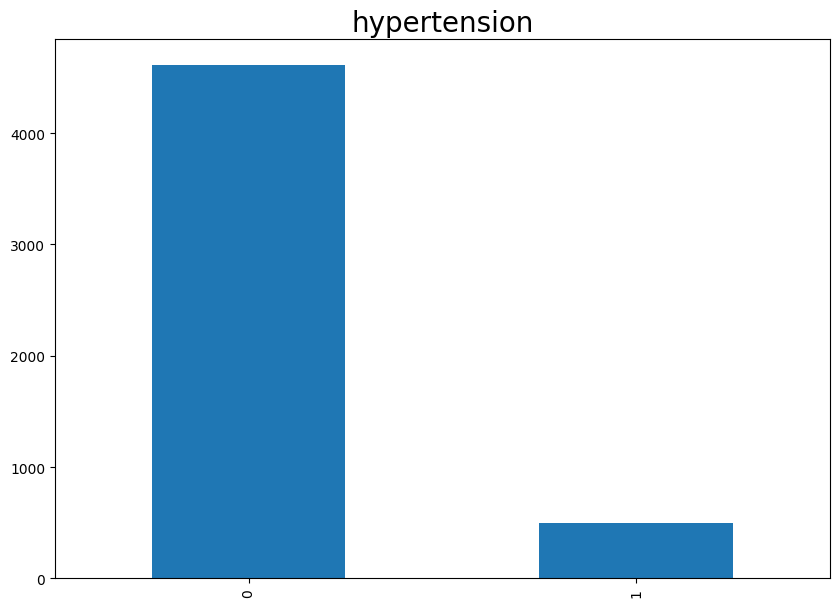

In [15]:
# Memvisualisasikan categorical features "hypertension"
plt.figure(figsize=(10, 7))
feature = categoric_features[1]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

   Jumlah Sampel  Persentase
0           4834        94.6
1            276         5.4


Text(0.5, 1.0, 'heart_disease')

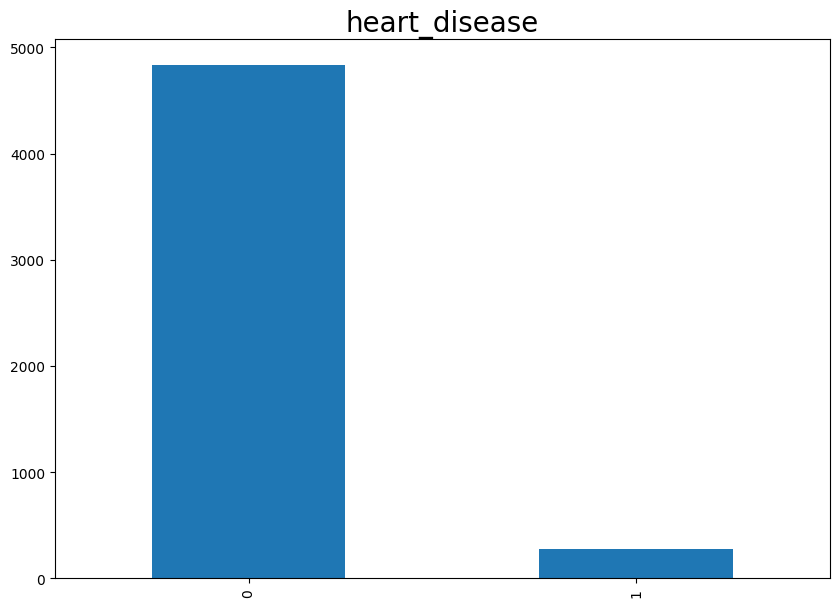

In [16]:
# Memvisualisasikan categorical features "heart_disease"
plt.figure(figsize=(10, 7))
feature = categoric_features[2]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

     Jumlah Sampel  Persentase
Yes           3353        65.6
No            1757        34.4


Text(0.5, 1.0, 'ever_married')

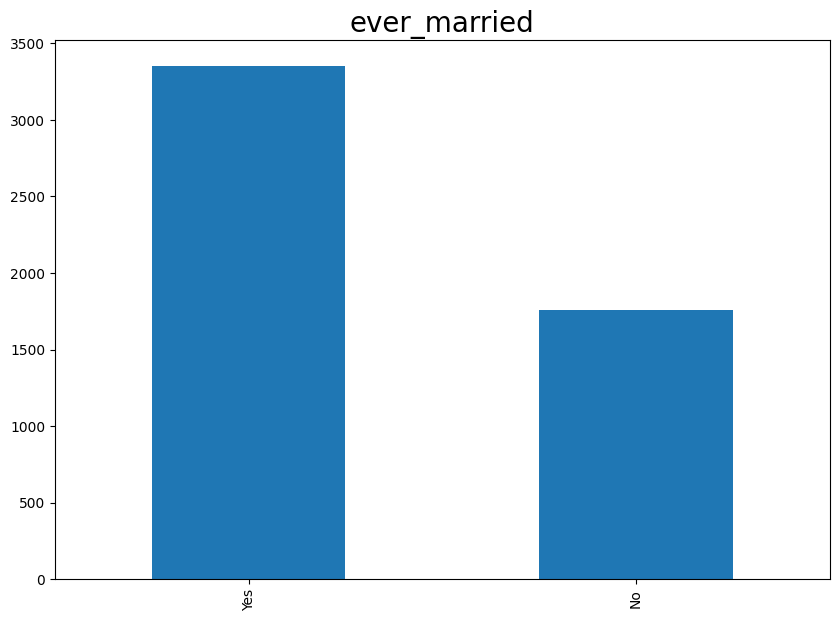

In [17]:
# Memvisualisasikan categorical features "ever_married"
plt.figure(figsize=(10, 7))
feature = categoric_features[3]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

               Jumlah Sampel  Persentase
Private                 2925        57.2
Self-employed            819        16.0
children                 687        13.4
Govt_job                 657        12.9
Never_worked              22         0.4


Text(0.5, 1.0, 'work_type')

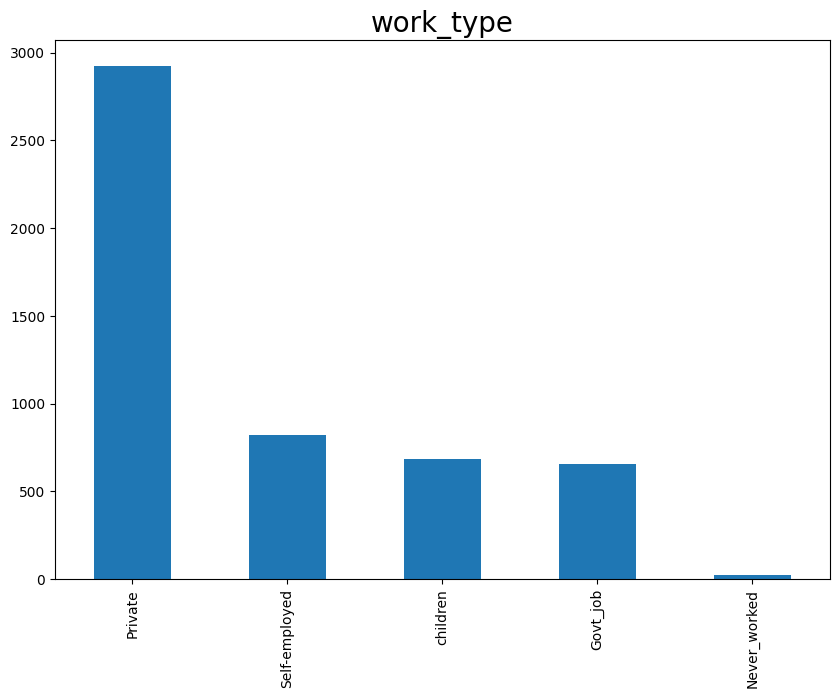

In [18]:
# Memvisualisasikan categorical features "work_type"
plt.figure(figsize=(10, 7))
feature = categoric_features[4]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

       Jumlah Sampel  Persentase
Urban           2596        50.8
Rural           2514        49.2


Text(0.5, 1.0, 'Residence_type')

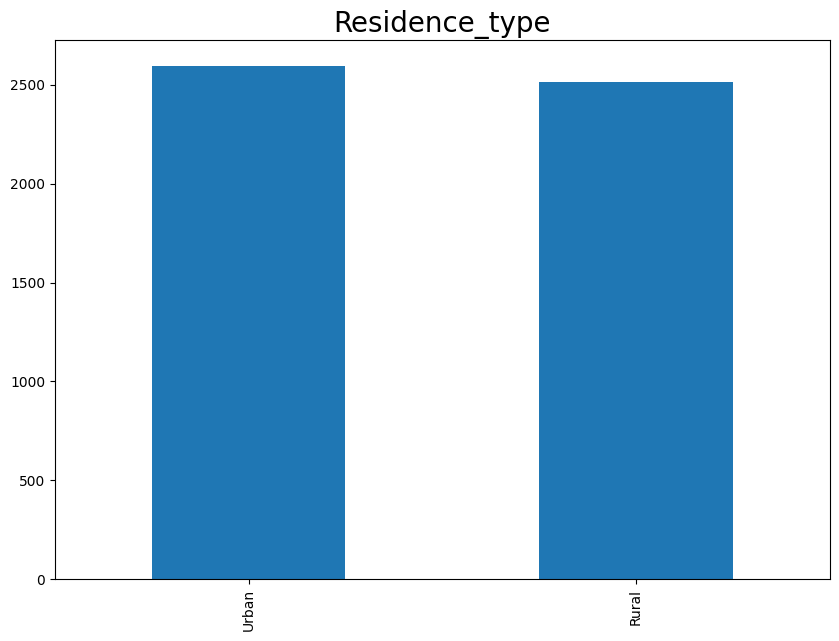

In [19]:
# Memvisualisasikan categorical features "Residence_type"
plt.figure(figsize=(10, 7))
feature = categoric_features[5]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

                 Jumlah Sampel  Persentase
never smoked              1892        37.0
Unknown                   1544        30.2
formerly smoked            885        17.3
smokes                     789        15.4


Text(0.5, 1.0, 'smoking_status')

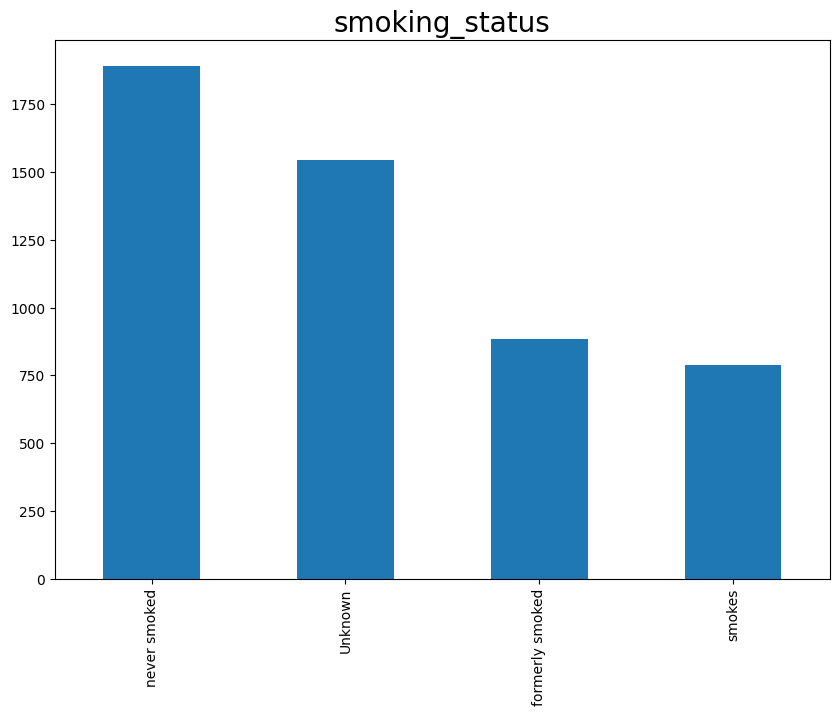

In [20]:
# Memvisualisasikan categorical features "smoking_status"
plt.figure(figsize=(10, 7))
feature = categoric_features[6]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

   Jumlah Sampel  Persentase
0           4861        95.1
1            249         4.9


Text(0.5, 1.0, 'stroke')

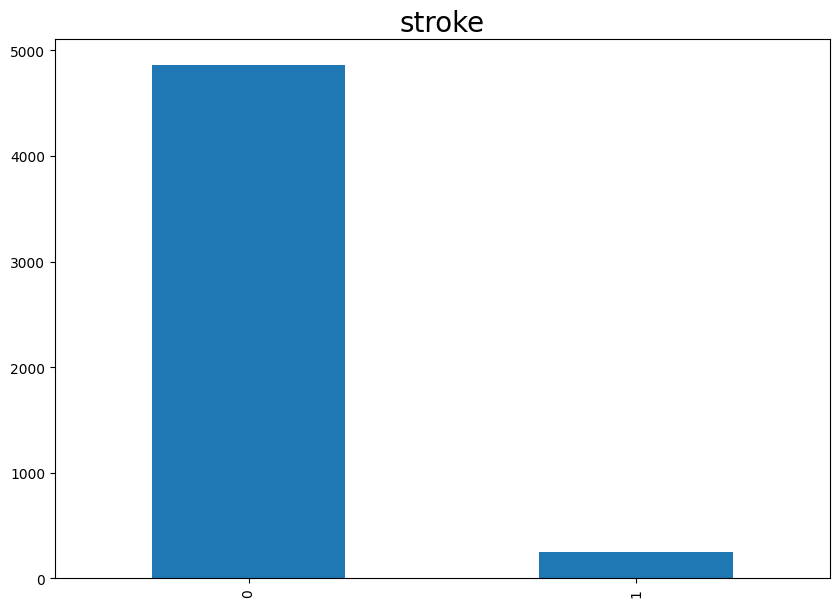

In [21]:
# Memvisualisasikan categorical features "stroke"
plt.figure(figsize=(10, 7))
feature = categoric_features[7]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

## **Numerical Features**

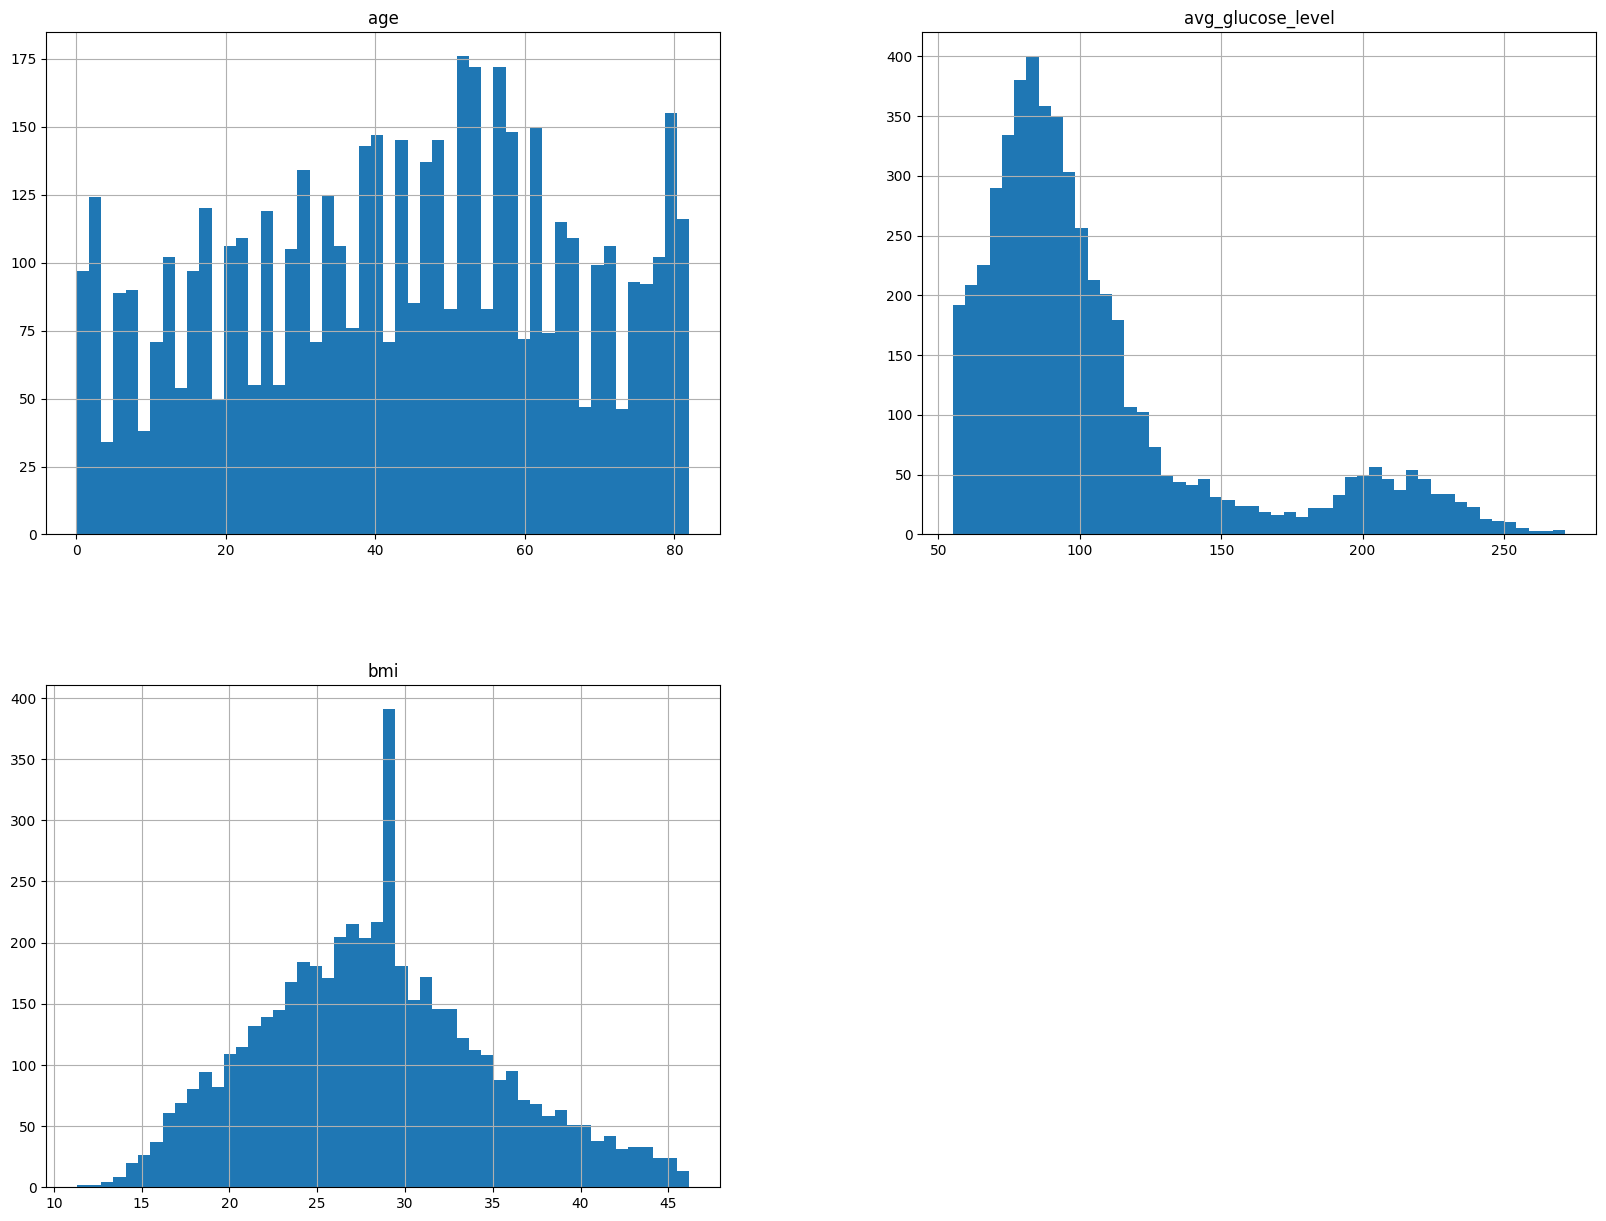

In [22]:
# Menampilkan histogram pada masing-masing numerical features
stroke_data[numeric_features].hist(bins=50, figsize=(20, 15))

plt.show()

# **EDA - Multivariate Analysis**

## **Categorical Features**

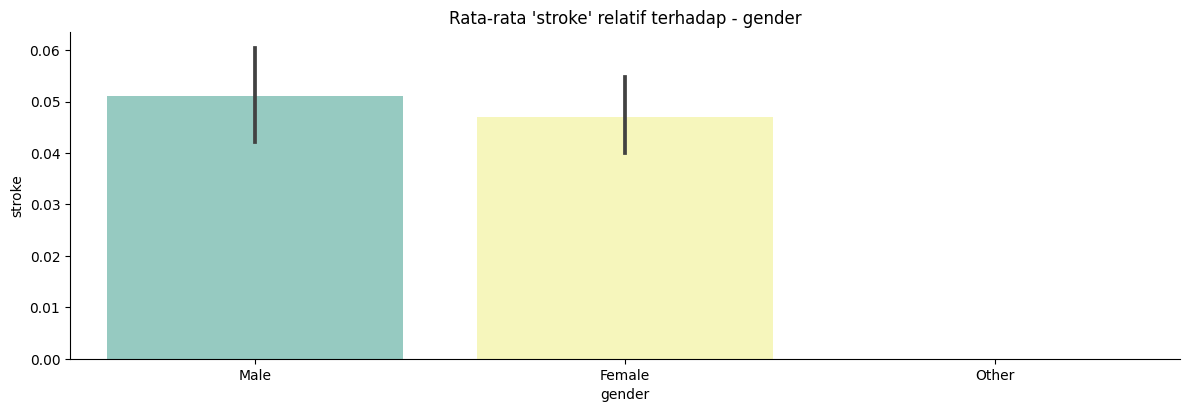

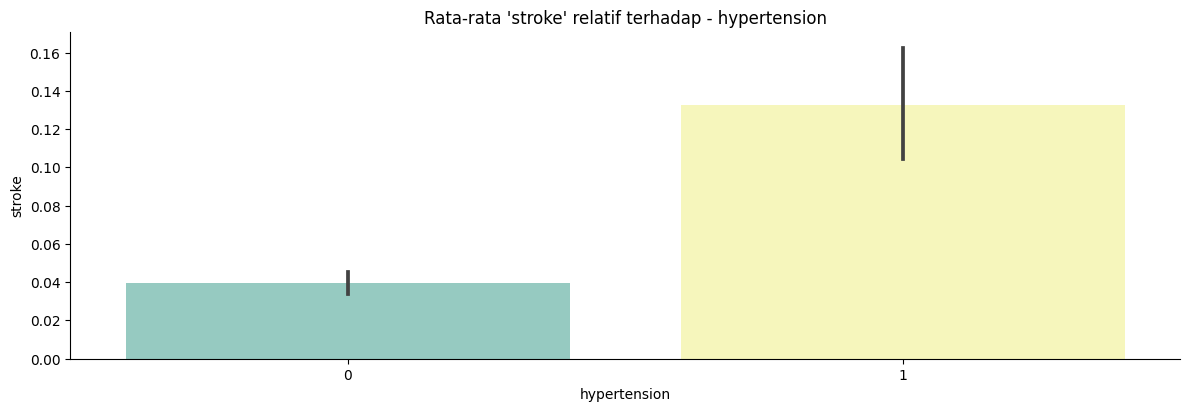

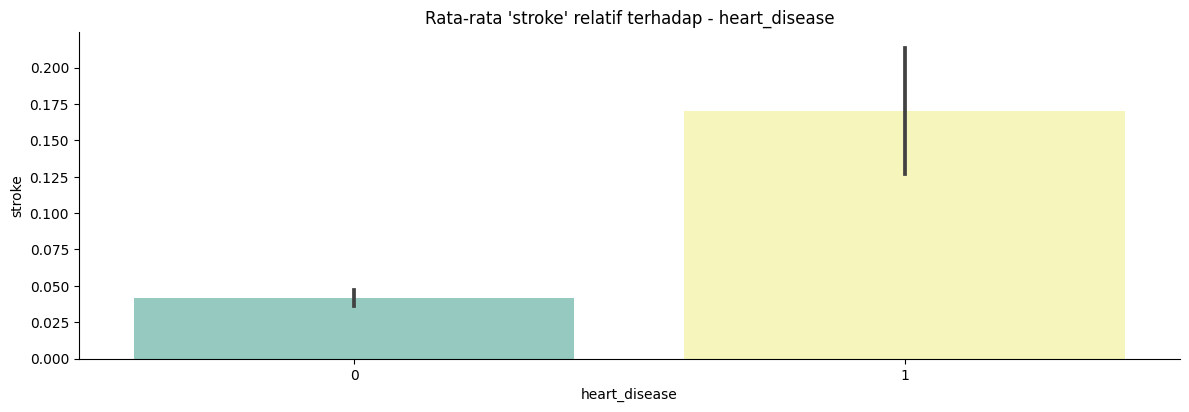

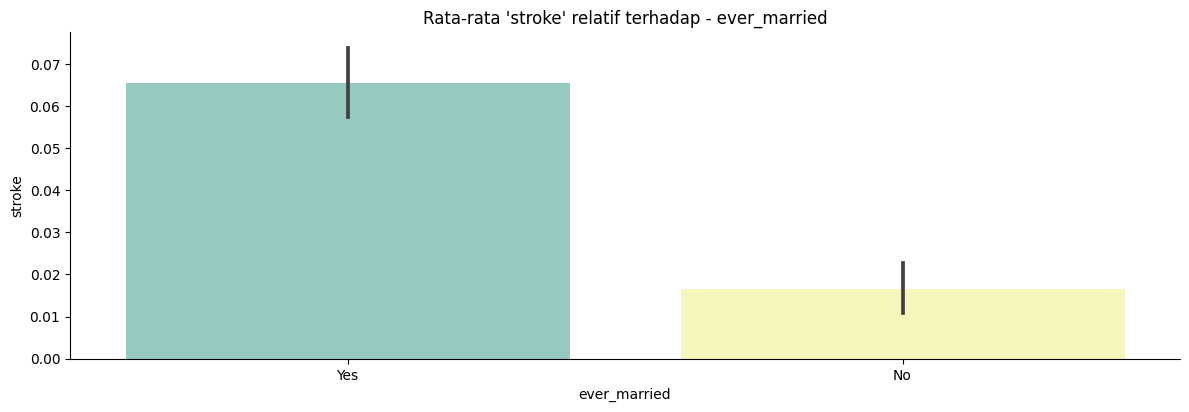

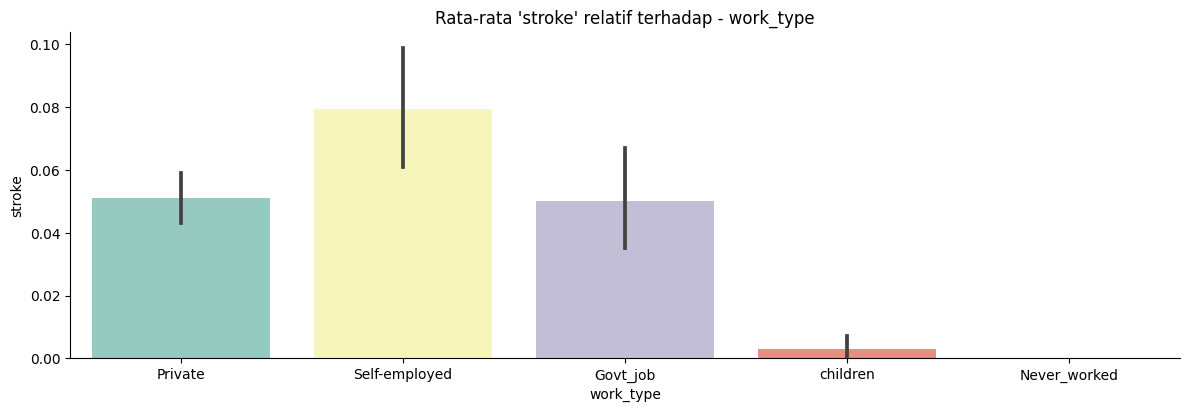

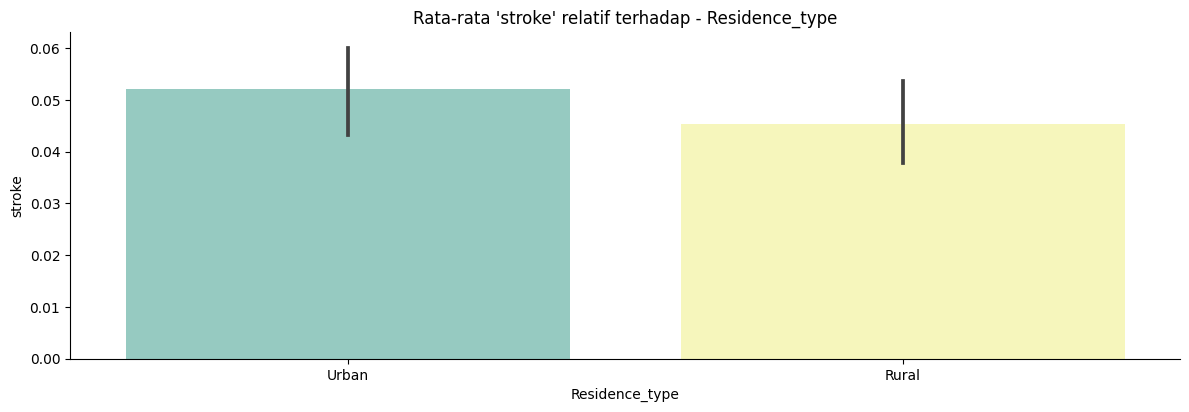

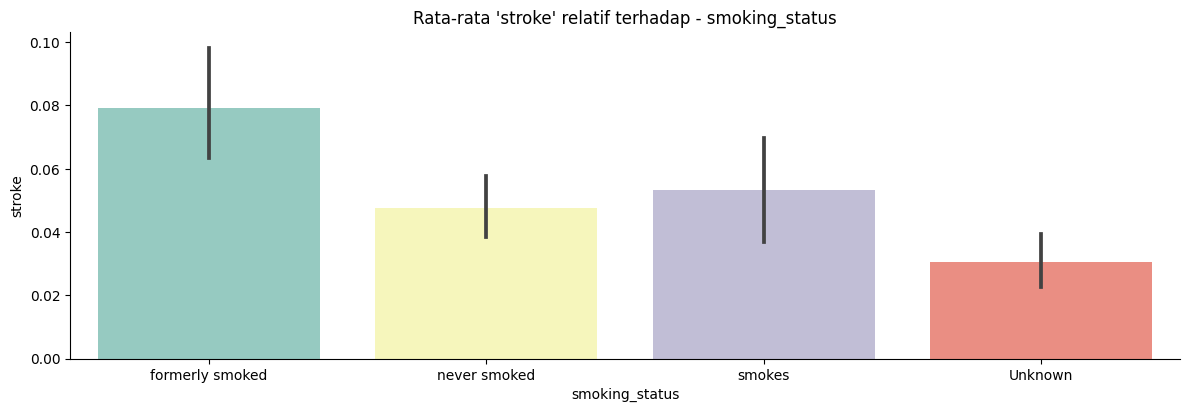

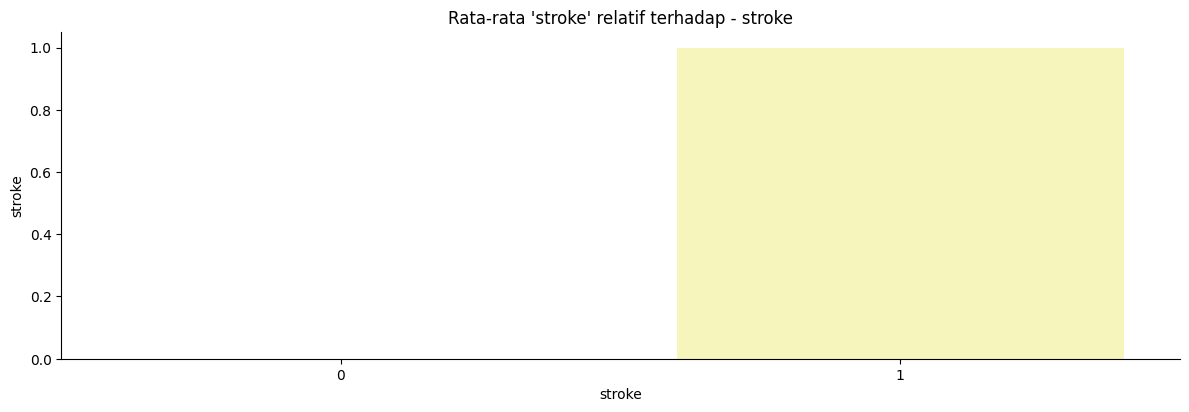

In [23]:
cat_features = stroke_data[categoric_features].columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4, aspect = 3,  data=stroke_data, palette="Set3")
  plt.title("Rata-rata 'stroke' relatif terhadap - {}".format(col))

## **Numerical Features**

Menampilkan kolerasi antar fitur numerical

Text(0.5, 1.0, '   Correlation Matrix untuk Fitur Numerik\n')

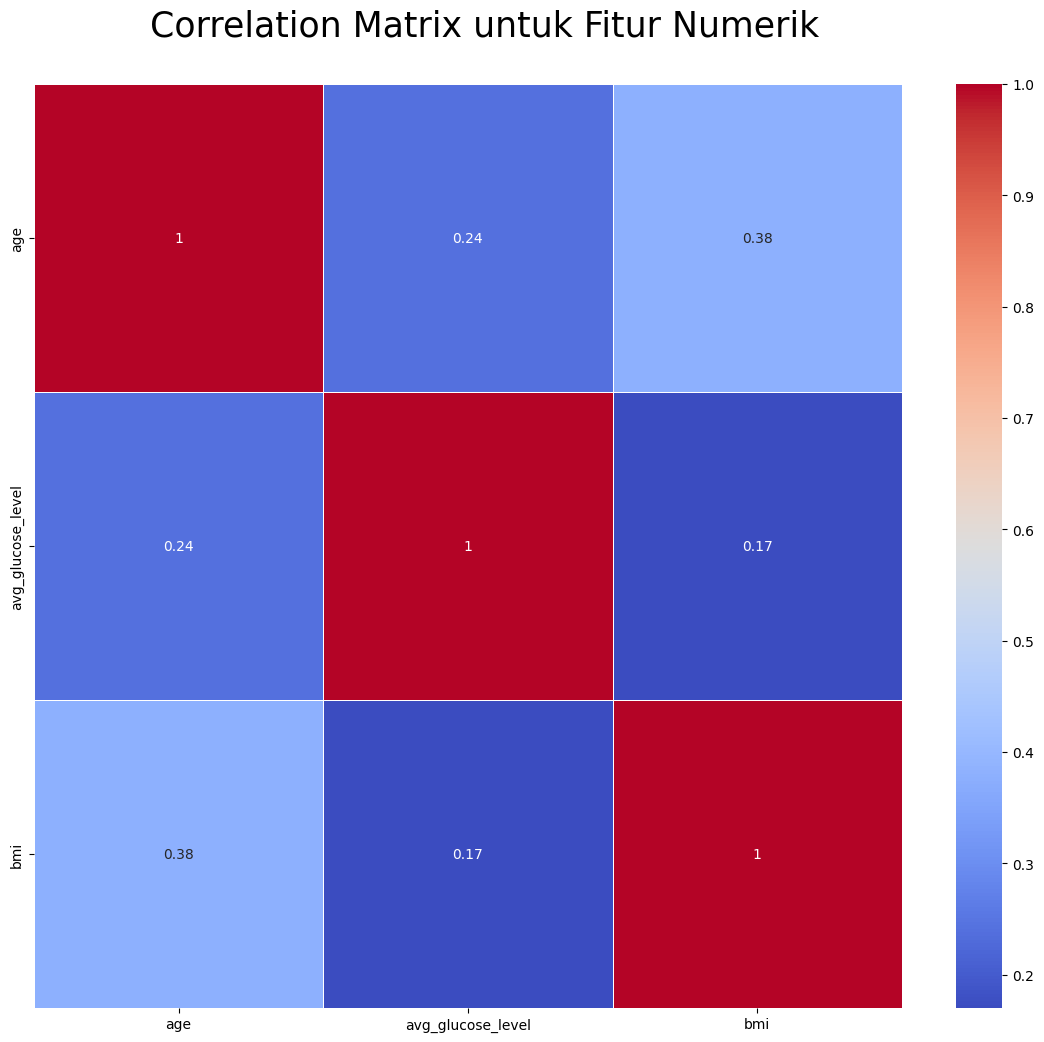

In [24]:
# Mengevaluasi skor korelasinya
plt.figure(figsize=(14, 12))
correlation_matrix = stroke_data[numeric_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title('   Correlation Matrix untuk Fitur Numerik\n', size=25)

# **Data Preparation**

Kolom "id" akan dihapus karena tidak dibuthkan dalam membuat sistem prediksi.

In [25]:
stroke_data.drop(['id'], axis=1, inplace=True)

stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [26]:
# Mengecek missing value pada dataset
stroke_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  126
smoking_status         0
stroke                 0
dtype: int64

Missing value didapatkan setelah penanganan outliers pada fitur "bmi".

In [27]:
# Menangani missing value pada fitur "bmi" diganti dengan nilai rata-rata berat badan
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

Pada tahap EDA - Univariate Analysis terhadap Categorical Features didapatkan sample "Other" pada fitur "gender" memiliki terlalu sedikit sample. Maka akan dilakukan penghapusan terhadap sample ini.

In [28]:
# Menghapus sample "Other" pada fitur "gender" karena hanya memiliki sedikit sample
stroke_data.drop(stroke_data[(stroke_data['gender'] == 'Other')].index, inplace=True)

## **Encoding Categorical Features**
Pada tahap ini categorical features bertipe object akan diubah menjadi numerical features dengan menggunakan Label Encoder.

In [29]:
stroke_data[:15]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [30]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [31]:
labelEnc = LabelEncoder()

gender = labelEnc.fit_transform(stroke_data['gender'])
ever_married = labelEnc.fit_transform(stroke_data['ever_married'])
work_type = labelEnc.fit_transform(stroke_data['work_type'])
Residence_type = labelEnc.fit_transform(stroke_data['Residence_type'])
smoking_status = labelEnc.fit_transform(stroke_data['smoking_status'])

In [32]:
stroke_data['gender']=gender
stroke_data['ever_married']=ever_married
stroke_data['work_type']=work_type
stroke_data['Residence_type']=Residence_type
stroke_data['smoking_status']=smoking_status

stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## **Mengatasi Data yang Tidak Seimbang**

   Jumlah Sampel  Persentase
0           4860        95.1
1            249         4.9


Text(0.5, 1.0, 'stroke')

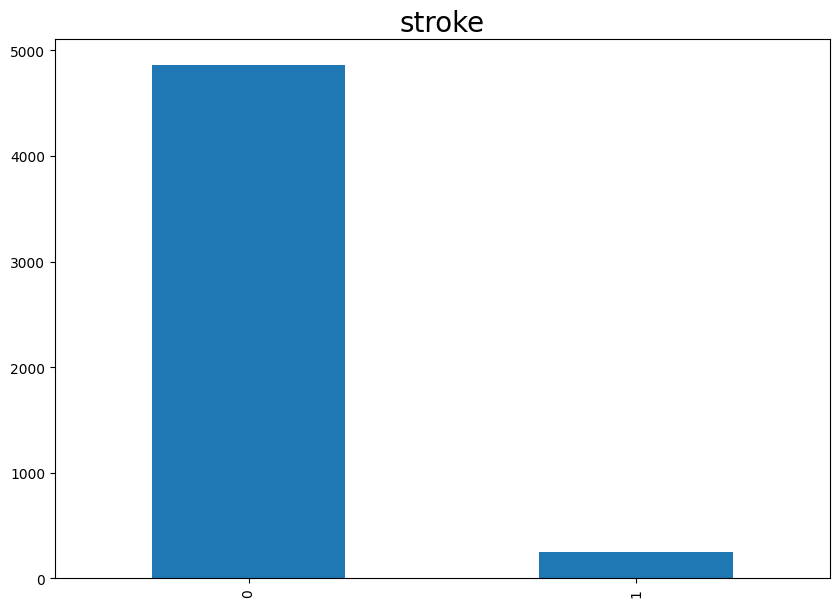

In [33]:
# Memvisualisasikan categorical features "stroke"
plt.figure(figsize=(10, 7))
feature = categoric_features[7]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

Diketahui pada fitur "stroke" dapat dikatakan memiliki data yang tidak seimbang, hal ini dapat dilihat perbedaan sample yang sangat signifikan antara sample yang tidak terindikasi stroke (0), dan sample yang terindikasi stroke (1). Maka hal ini akan ditangani dengan teknik oversampling menggunakan SMOTE.

SMOTE merupakan salah satu pendekatan untuk mengatasi kumpulan data yang tidak seimbang dengan mengambil sample kelas minoritas secara berlebihan. Pendekatan paling sederhana melibatkan duplikasi contoh di kelas minoritas, meskipun contoh ini tidak menambahkan informasi baru ke model. Sebaliknya, contoh baru dapat disintesis dari contoh yang sudah ada. Ini adalah jenis augmentasi data untuk kelas minoritas dan disebut sebagai Synthetic Minority Oversampling Technique, atau disingkat SMOTE.

In [34]:
X = stroke_data.loc[:, stroke_data.columns != 'stroke']
y = stroke_data['stroke']

smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=78)

X_smote, y_smote = smote.fit_resample(X, y)

stroke_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

   Jumlah Sampel  Persentase
1           4860        50.0
0           4860        50.0


Text(0.5, 1.0, 'stroke')

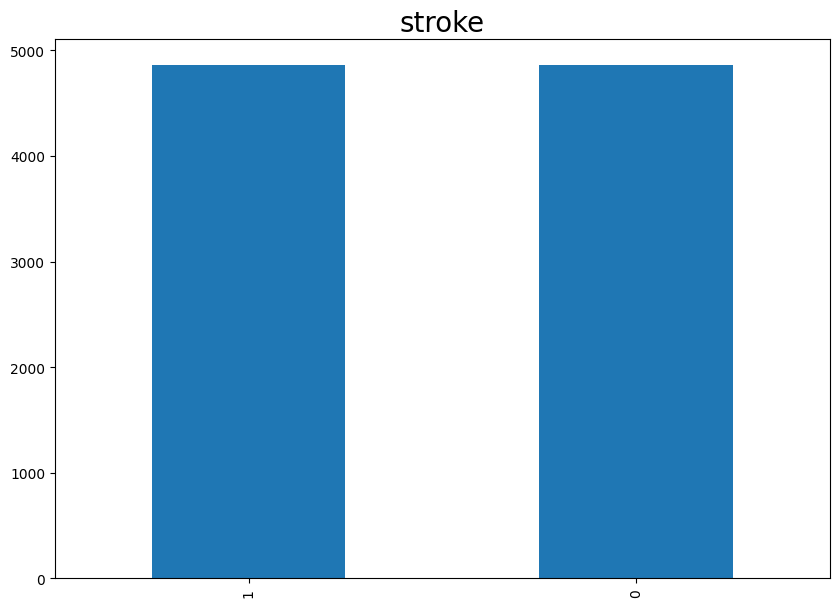

In [35]:
# Memvisualisasikan categorical features "stroke"
plt.figure(figsize=(10, 7))
feature = categoric_features[7]
count = stroke_data[feature].value_counts()
percent = 100 * stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar');
plt.title(feature, size=20)

## **Train-Test-Split**

In [36]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
X = stroke_data.drop(['stroke'], axis=1)
y = stroke_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Mengecek jumlah sample pada masing-masing bagian
print(f'Total # of sample in whole dataset : {len(X)}')
print(f'Total # of sample in train dataset : {len(X_train)}')
print(f'Total # of sample in test dataset  : {len(X_test)}')

Total # of sample in whole dataset : 9720
Total # of sample in train dataset : 7776
Total # of sample in test dataset  : 1944


## **Standarisasi**
Digunakan StandardScaler dalam melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Menyimpan Scaler Object**
Scaler object disimpan dalam format pickle untuk nantinya digunakan dalam melakukan proses deployment.

In [38]:
! mkdir ML-Models

A subdirectory or file ML-Models already exists.


In [39]:
import os
# Menyimpan scaler object
# root = '/content'
scaler_path = os.path.join('ML-Models/scaler.pkl')
with open(scaler_path, 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)

# **Model Development**
Dalam mengembangkan model Machine Learning pada proyek ini digunakan 3 algoritma, yang kemudian akan devaluasi performa dari masing-masing algoritma dan menentukan salah satu algoritma yang memiliki hasil terbaik.

In [40]:
# Menyiapkan dataframe untuk analisis menggunakan 3 model algoritma
models = pd.DataFrame(index=['train_f1', 'test_f1'],
                      columns=['K-Nearest Neighbor', 'Decision Tree', 'Random Forest'])

## **Model Development dengan K-Nearest Neighbor**

In [41]:
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train, y_train)

models.loc['train_f1', 'knn'] = f1_score(y_pred = knn.predict(X_train), y_true=y_train)

print('Train Score :', knn.score(X_train, y_train))
print('Test Score  :', knn.score(X_test, y_test))

Train Score : 0.9835390946502057
Test Score  : 0.9516460905349794


## **Model Development dengan Decision Tree**

In [42]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2, min_samples_split=7)
dt.fit(X_train, y_train)

models.loc['train_f1', 'dt'] = f1_score(y_pred = dt.predict(X_train), y_true=y_train)

print('Train Score :', dt.score(X_train, y_train))
print('Test Score  :', dt.score(X_test, y_test))

Train Score : 0.9834104938271605
Test Score  : 0.933641975308642


## **Model Development dengan Random Forest**

In [43]:
rf = RandomForestClassifier(n_estimators=32, max_depth=32, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

models.loc['train_f1', 'rf'] = f1_score(y_pred = rf.predict(X_train), y_true=y_train)

print('Train Score :', rf.score(X_train, y_train))
print('Test Score  :', rf.score(X_test, y_test))

Train Score : 0.9998713991769548
Test Score  : 0.963477366255144


# **Evaluasi Model**

In [44]:
# Buat variabel mse yang isinya adalah dataframe nilai f1 data train dan test pada masing-masing algoritma
f1 = pd.DataFrame(columns=['train', 'test'], index=['K-Nearest Neighbor', 'Decision Tree', 'Random Forest'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'K-Nearest Neighbor': knn, 'Decision Tree': dt, 'Random Forest': rf}

# Hitung f1 score masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  f1.loc[name, 'train'] = f1_score(y_true=y_train, y_pred=model.predict(X_train), average='micro') 
  f1.loc[name, 'test'] = f1_score(y_true=y_test, y_pred=model.predict(X_test), average='micro')
 
# Panggil f1
f1

,train,test
K-Nearest Neighbor,0.983539,0.951646
Decision Tree,0.98341,0.933642
Random Forest,0.999871,0.963477


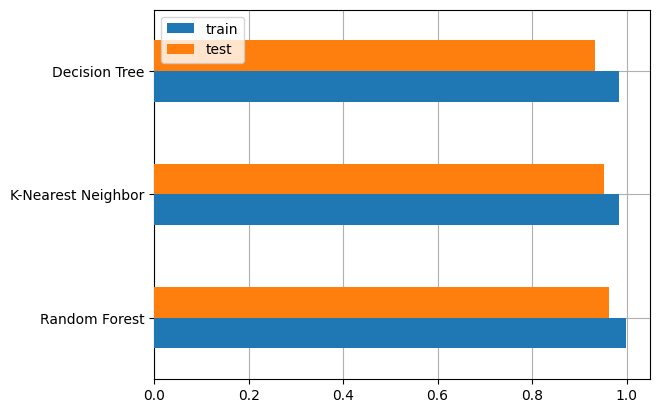

In [45]:
# Menampilkan plot
fig, ax = plt.subplots()
f1.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.legend(loc=2)

Dapat diketahui bahwa model development dengan algoritma Random Forest memiliki akurasi tertinggi dengan nilai akurasi test 96%. Maka algoritma inilah yang akan digunakan untuk proses web deployment.

# **Menyimpan Model dengan Akurasi Terbaik**
Setelah proses pelatihan model, kemudian algoritma Random Forest disimpan dalam format pickle untuk nantinya digunakan dalam proses deployment.

In [46]:
pickle.dump(rf, open('ML-Models/model.pkl', 'wb'))

Setelah proses penyimpanan, maka model Machine Learning telah siap untuk dilakukan proses web deployment.